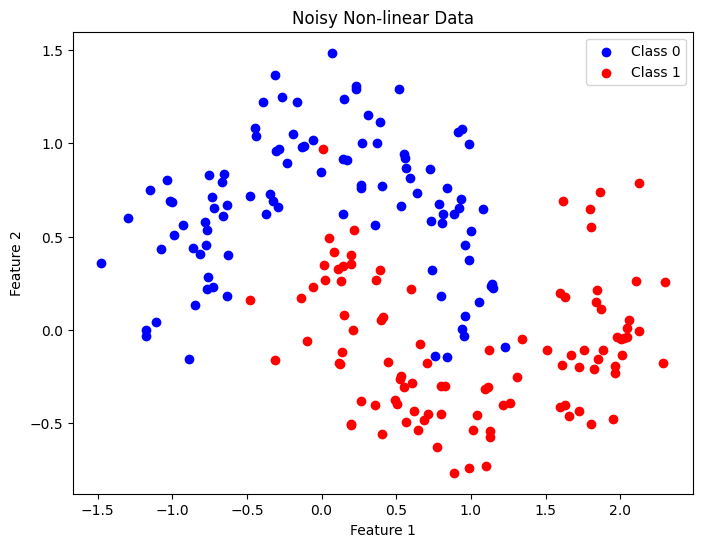

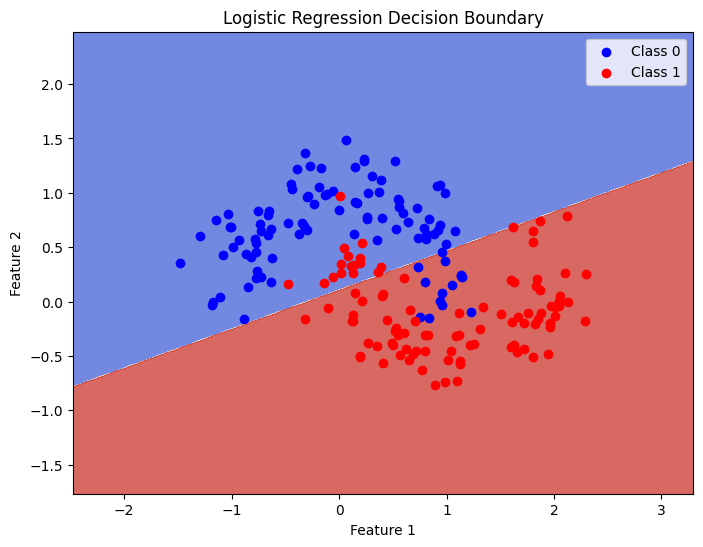

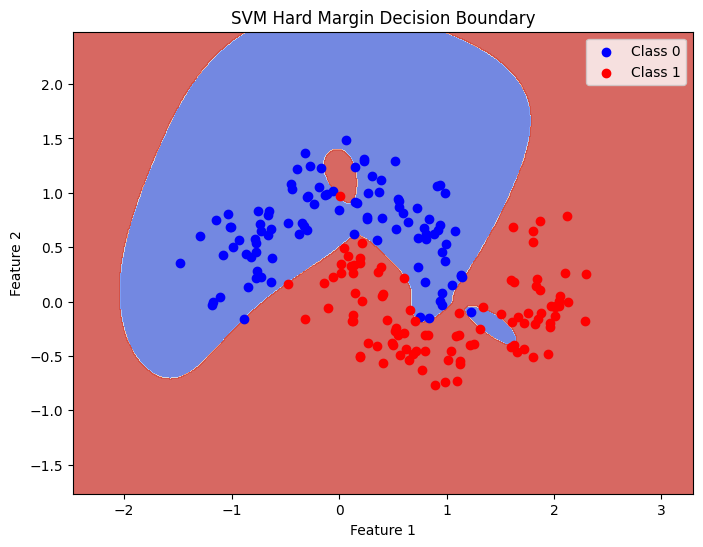

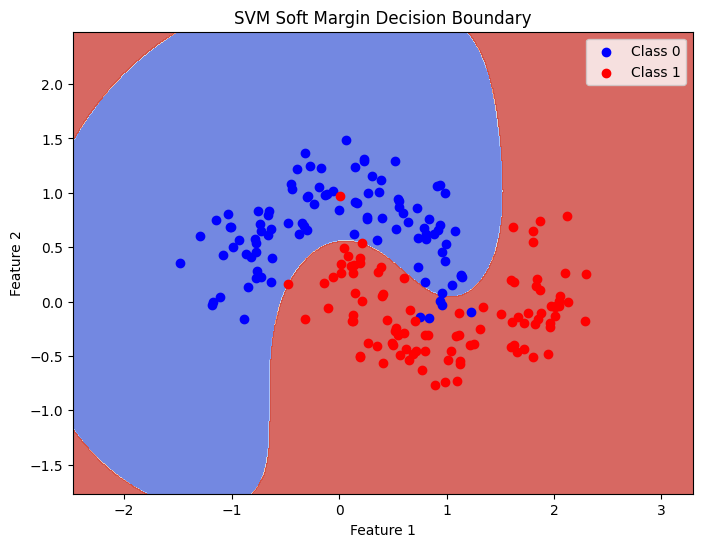

Logistic Regression Log Loss: 0.3190


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss

# Generating noisy non-linear data
np.random.seed(42)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title("Noisy Non-linear Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# SVM with hard margin
svm_hard = SVC(kernel='rbf', C=1e6)  # High C simulates a hard margin
svm_hard.fit(X, y)

# SVM with soft margin
svm_soft = SVC(kernel='rbf', C=1.0)  # Default C=1 for soft margin
svm_soft.fit(X, y)

# decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Logistic regression decision boundary
plot_decision_boundary(log_reg, X, y, "Logistic Regression Decision Boundary")

plot_decision_boundary(svm_hard, X, y, "SVM Hard Margin Decision Boundary")

plot_decision_boundary(svm_soft, X, y, "SVM Soft Margin Decision Boundary")

# Logistic regression Cost function plot
log_probs = log_reg.predict_proba(X)
loss = log_loss(y, log_probs)

print(f"Logistic Regression Log Loss: {loss:.4f}")
